# Company(Regression Task)

**Name**:-  Samir Chaulagain

**University ID**:-  2066031

**Module leader**:- Siman Giri

**Tutor**:- Anmol Adhikari


## Companies profit prediction using multiple linear regression 

### Overview

With the features at our disposal, we will use Task 2 to forecast the profit from the companies . In order to estimate the profitability of companies, we will use the concept of multiple linear regression and the dataset of 1000-Companies.

# 1. Data Understanding





This dataset has data collected from New York, California and Florida about companies "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

It's a great df_companyany for evaluating Multiple regression models.

Goal:-
To predict whether a particular startup would be safe to invest in or not.

df_companyany contain 5 columns--"R&D Spend","Administration","Marketing Spend","State","Profit".

1. R&D Spend Research and development : Expenditure in Research and development feild of the comapny.
2. Administration It is the process of arrangements and tasks needed to control the operation of a plan or organization.

3. Marketing Spend refers to activities undertaken by a company to promote the buying or selling of a product or service. Marketing includes advertising, selling, and delivering products to consumers or other businesses.

4. State This column contain three states which is Califonia,Newyork and Floida.

5. Profit
Profit is a financial benefit that is realized when the amount of revenue gained from a business activity exceeds the expenses, costs, and taxes needed to sustain the activity.

Analytical Approach i.e Ordinary Least Square Methods
Machine Learning Approach i.e Using Gradient Descent In this exercise you are expected to implement both the methods from scratch.
The task of the Regression Algorithm is to find the maping function to map the input variable(x) to teh continious output variable(y). Regression analysis estimates the realtionship between a dependent variables and independent variables. In the class we talked about two different approach



### Importing libraries
Step 1: Importing the libraries
We will import the libraries needed to create the ML model in this initial stage. The seaborn, matplotlib, sklearn, and the NumPy libraries are imported. For data analysis, we have also imported the Pandas library.

In [76]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the df_company
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

### Importing the Dataset

To store the data obtained from Kaggle, we will use Pandas to create a Pandas DataFrame named as "companies dataset" using the function. We assign the independent variable (x) to the first four columns of the df_company: R&D Spend (index=0), Administration (index=1), Marketing Spend (index=2), and State (index=3). 

In [77]:
from google.colab import drive  #mounting google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df_company = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProtfolioAI/10regression.csv') #storing loaded dataset in dataframe

## 2. Analyzing the data

In [80]:
df_company.head() #top 5 entries of company

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [81]:
df_company.tail() #last 5 entries of company

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [82]:
df_company.sample(5) #5 Random entries of dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
82,9078.0,111797.7760,86295.06497,California,56788.15621
811,138546.0,130918.2000,336103.92450,Florida,167391.55140
597,9960.0,111928.0338,87996.88638,Florida,57541.64120
291,155075.0,133359.2780,367996.67520,California,181512.13350
784,90061.0,123757.7143,242551.98460,California,125971.23430


In [83]:
df_company.shape #dispaly dimension

(1000, 5)

In [84]:
len(df_company) # number of entries of dataset

1000

In [85]:
# Numerical/Statistical analysis of the df_company
df_company.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [86]:
# Check for NULL values
df_company.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Inference :** There are no null values in the df_company  

In [87]:
# Schema of df_company
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [88]:
# from corr function we can find the correlation between the columns.
c = df_company.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


**Inference:**  We can obseve that all three columns have a **direct relationship with the profit**, which is our target variable.

# Visualization of data

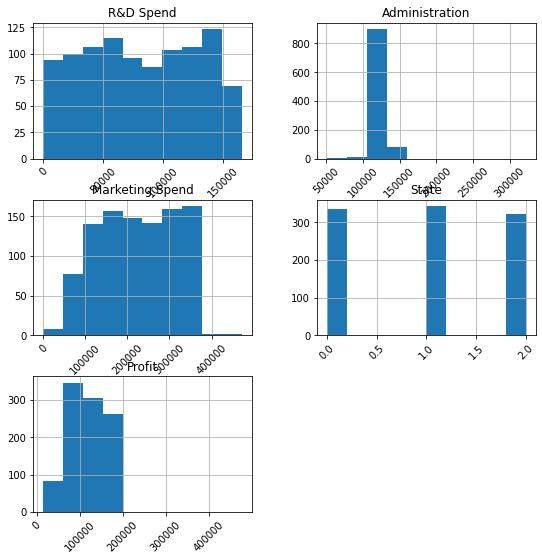

In [131]:
#Plot histogram 
df_company.hist(xrot=45, figsize=(9,9))
plt.show()

#Here we are able to see distribution of each feature in the farm of Scatter plot


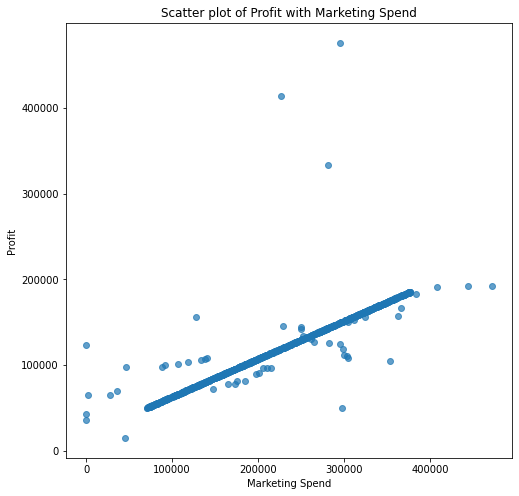

In [132]:

#displays scatter plot of Marketing spend and profit
plt.scatter(df_company['Marketing Spend'], df_company['Profit'], alpha=0.7)
plt.title('Scatter plot of Profit with Marketing Spend')              
plt.xlabel('Marketing Spend')                          
plt.ylabel('Profit')   
plt.show()

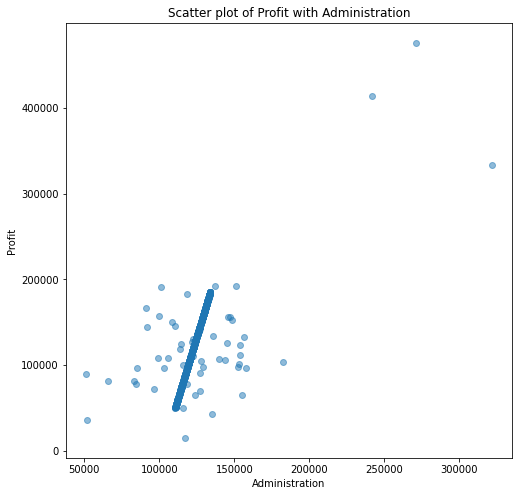

In [91]:
#displays scatter of Adminstration and profit
plt.scatter(df_company['Administration'], df_company['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')              
plt.xlabel('Administration')                          
plt.ylabel('Profit')   
plt.show()

Text(0, 0.5, 'Profit')

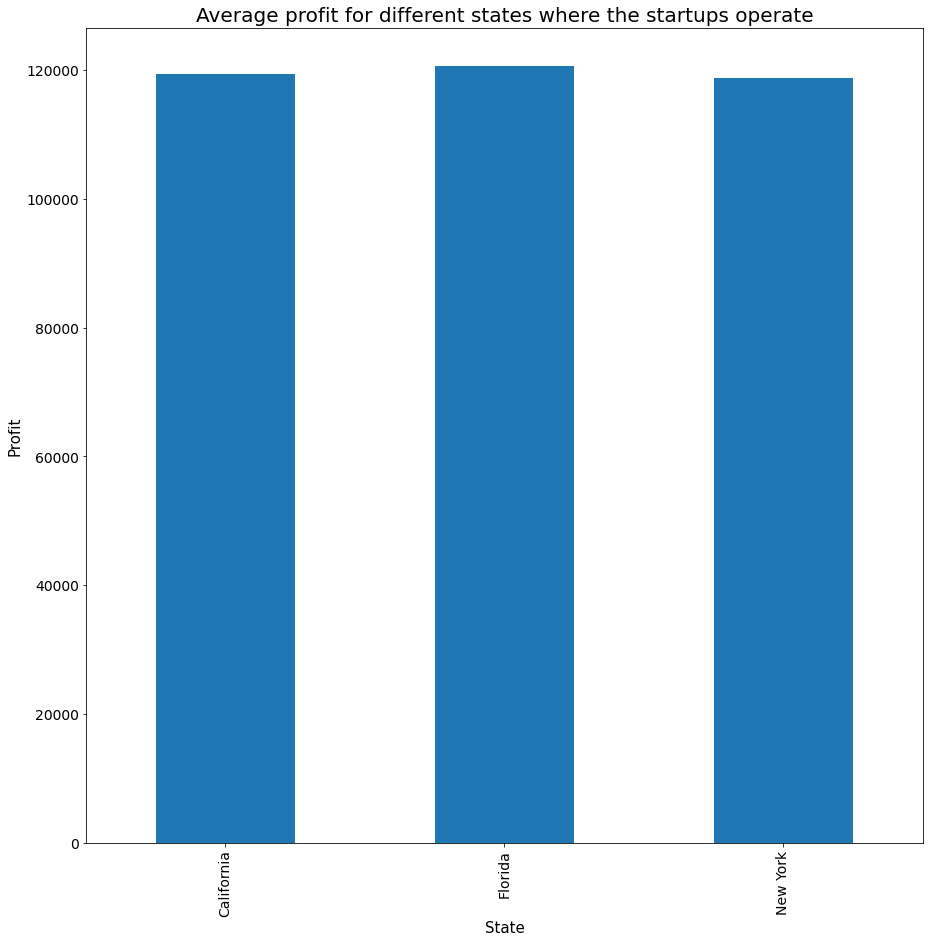

In [92]:
from IPython.core.pylabtools import figsize

display = df_company.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (15,15),
    fontsize = 14
)

#Set the title
display.set_title("Average profit for different states where the startups operate", fontsize = 20)
#Set x and y-labels
display.set_xlabel("State", fontsize = 15)
display.set_ylabel("Profit", fontsize = 15)

In [93]:
#counts number of state in dataset
df_company.State.value_counts()


California    344
New York      334
Florida       322
Name: State, dtype: int64

### Exploratory Data Analysis on dataset

**Correlation matrix**

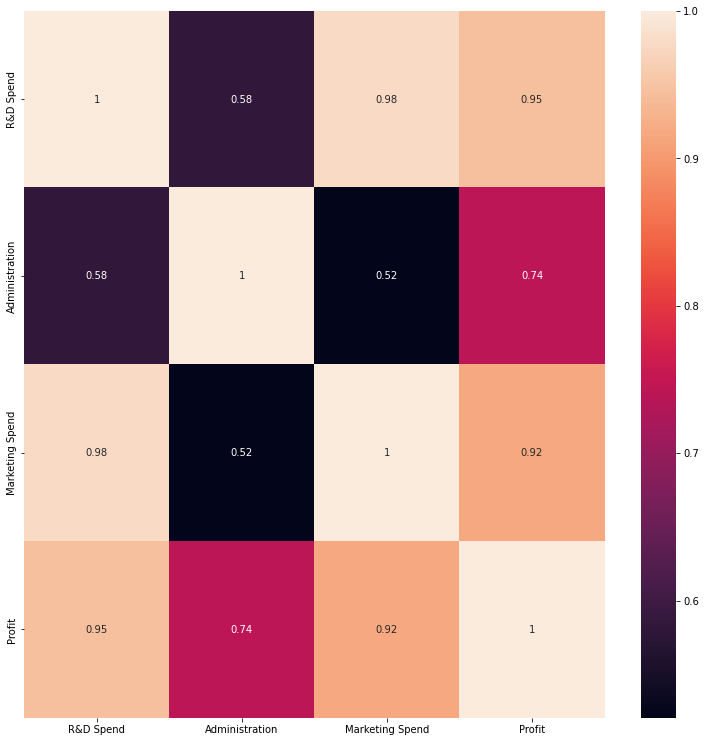

In [94]:
#Correlation matrix from finding most significant variable
import seaborn as sns
plt.figure(figsize=(13,13))
correlation = df_company.corr().round(4)
sns.heatmap(data=correlation,annot=True)
plt.show()

In [95]:
# from corr function we can find the correlation between the columns.
corr_column = df_company.corr()
corr_column

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [96]:
df_company.corr(method='pearson')


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


# Scatter plot


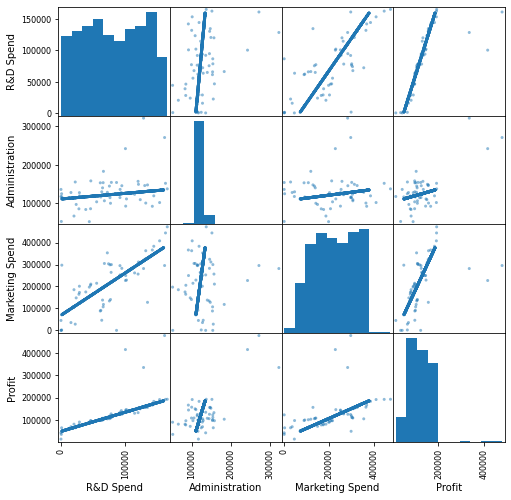

In [97]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_company)
plt.show() #visualizing the relationship between multiple variables in a dataset. 

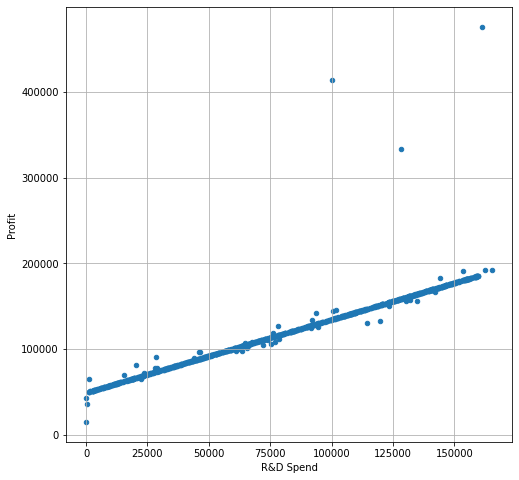

In [98]:
#display scatter plot of R&D Spend and Profit
df_company.plot.scatter(x= 'R&D Spend', y= 'Profit')                         
plt.grid()   
plt.show()


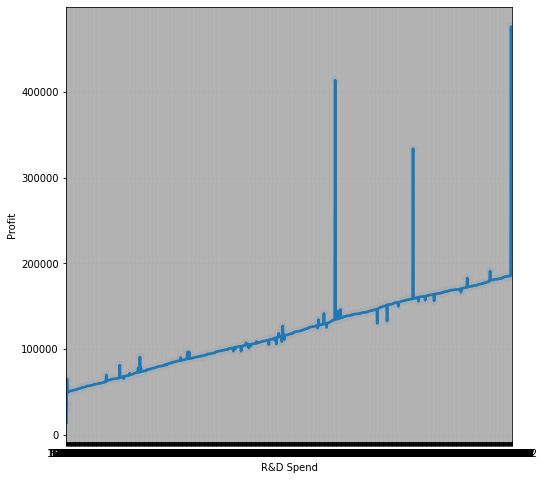

In [99]:
#The plot between Profit and R&D Spend
sns.pointplot(x = 'R&D Spend', y = 'Profit', data = df_company)
plt.grid()
plt.show()

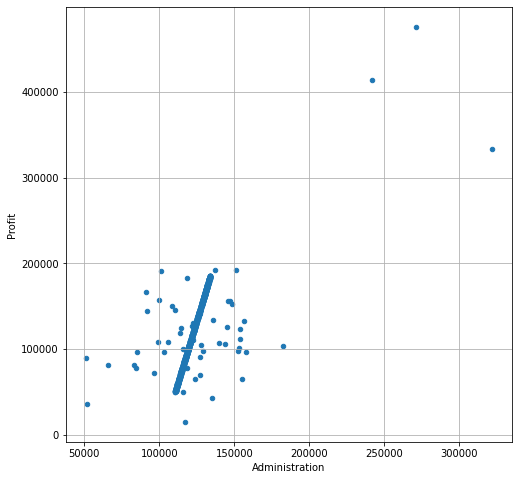

In [100]:
##display scatter plot of Administration and Profit
df_company.plot.scatter(x= 'Administration', y= 'Profit')                         
plt.grid()   
plt.show()


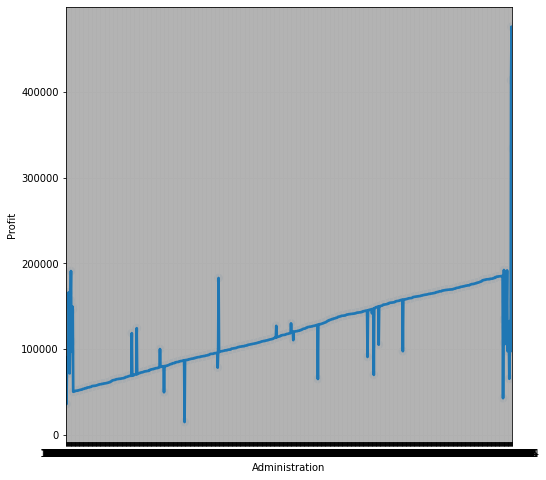

In [101]:
#The plot between Profit and Adminstration
sns.pointplot(x = 'Administration', y = 'Profit', data = df_company)
plt.grid()
plt.show()

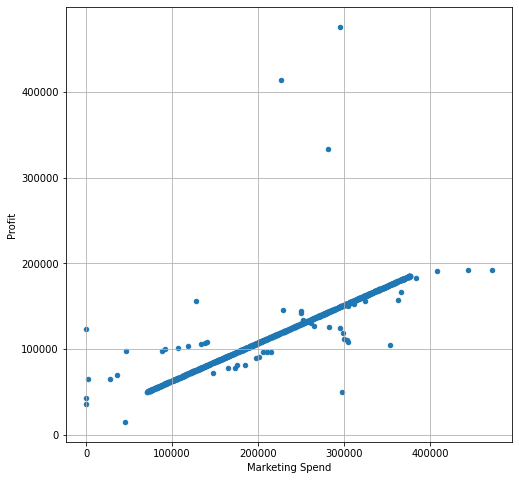

In [102]:
#display scatter plot of Marketing Spend and Profit
df_company.plot.scatter(x= 'Marketing Spend', y= 'Profit')                         
plt.grid()   
plt.show()


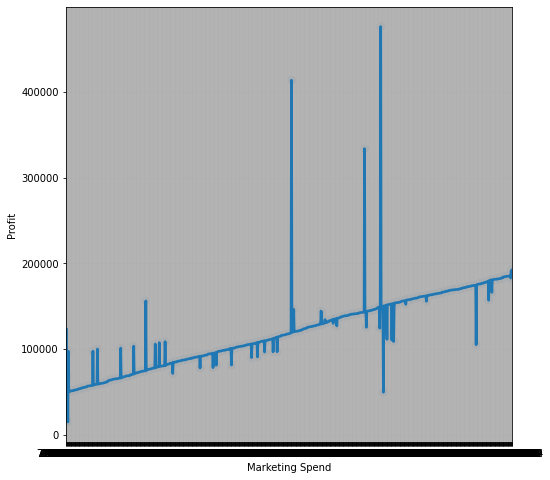

In [103]:
#The plot between Profit and R&D Spend

sns.pointplot(x = 'Marketing Spend', y = 'Profit', data = df_company)
plt.grid()
plt.show()

-  **Outliers detection** in **target variable**

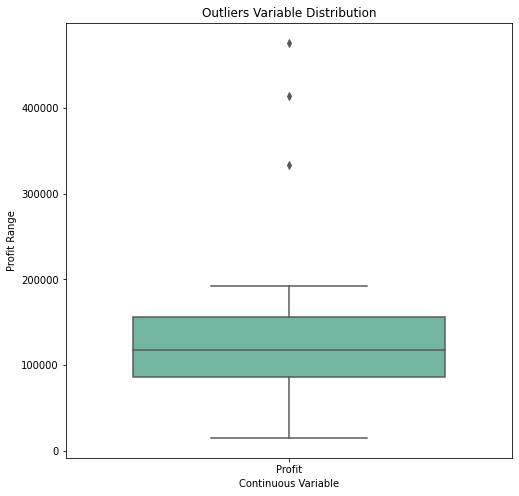

In [104]:
OD = ['Profit']
# size of the plot to 8x8 inches
plt.rcParams['figure.figsize'] = [8,8]

# orient="v" specifies a vertical boxplot
# palette="Set2" sets the color palette for the plot
# width=0.7 sets the width of the boxes in the plot
sns.boxplot(data=df_company[OD], orient="v", palette="Set2" , width=0.7) 

# title of the plot
plt.title("Outliers Variable Distribution")
# label for the y-axis
plt.ylabel("Profit Range")
# label for the x-axis
plt.xlabel("Continuous Variable")
# display plot
plt.show()

Although the boxplot shows the outliers in the profit (the target variable), there are only 50 entries, therefore there won't be a significant influence(it will not create negative impact). 

- **State wise** outliers detection 

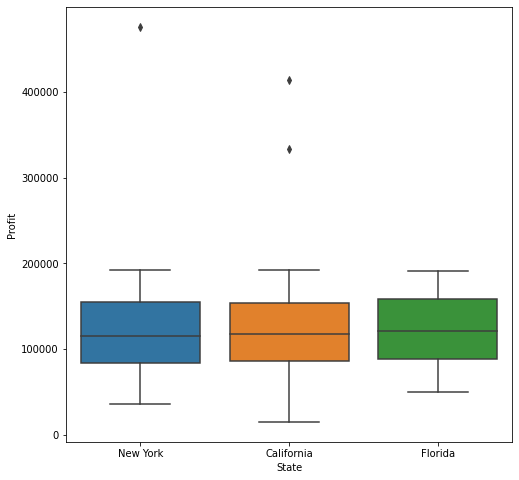

In [105]:
# display relationship between CATEGORICAL & NUMERICAL FEATURE NAME
sns.boxplot(x = 'State', y = 'Profit', data = df_company)
plt.show()

**Insights**

- The state of New York is home to all of the presented outliers.
- The difference between the minimum and maximum profit is wider for startups in the state of California.

**Histgram** on Profit 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


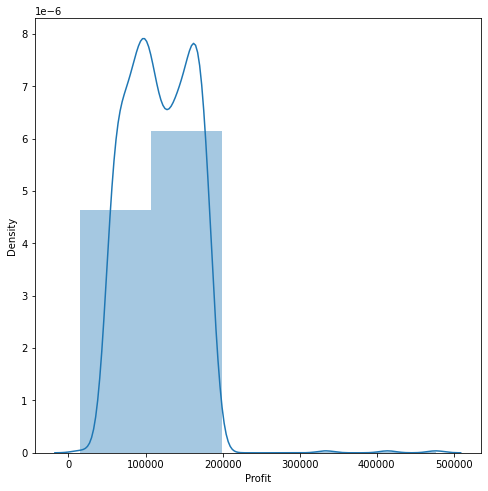

In [106]:
# Display showing the probability density function of the data.
sns.distplot(df_company['Profit'],bins=5,kde=True)
plt.show()

# **Pairplot**

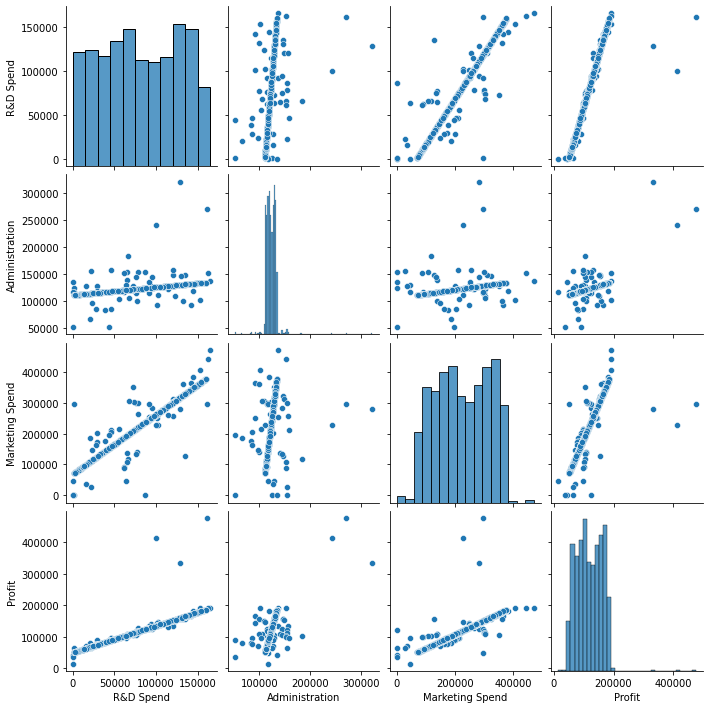

<Figure size 360x360 with 0 Axes>

In [107]:
# creates a pairplot of the "df_company" dataframe 
sns.pairplot(df_company)
plt.figure(figsize=(5,5))
# display pairplot
plt.show()

**Inference:**

- As we can see from the pairpot, your profit will increase in direct proportion to your investment in Research and development.
- Although there are a few small exceptions, it appears that marketing expenditures are directly correlated with profits.
- The cost of administration appears to have no bearing on revenue.

#Data Cleaning


- Check the Duplicate entries, if exists then remove those duplicate from the data frame

In [108]:
#Check the Number of the Rows before Removing Duplicate
df_company.shape

(1000, 5)

In [109]:
#Call drop duplicate on dataframe to remove Duplicates and Assign it backs to Dataframe
df_company = df_company.drop_duplicates()

In [110]:
#Check the Number of Rows after Removing Duplicates
df_company.shape

(999, 5)

In [111]:
#checking information of dataframes
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        999 non-null    float64
 1   Administration   999 non-null    float64
 2   Marketing Spend  999 non-null    float64
 3   State            999 non-null    object 
 4   Profit           999 non-null    float64
dtypes: float64(4), object(1)
memory usage: 46.8+ KB


**No** Duplicates in the given df_company

### 3. Model Development

In [112]:
#unique values at state column
df_company.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [113]:
#mapping State column
df_company.State = df_company.State.map({"New York":0, "California":1,"Florida":2})
df_company

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,0,192261.83000
1,162597.70,151377.590,443898.5300,1,191792.06000
2,153441.51,101145.550,407934.5400,2,191050.39000
3,144372.41,118671.850,383199.6200,0,182901.99000
4,142107.34,91391.770,366168.4200,2,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,95279.96251
996,134970.00,130390.080,329204.0228,1,164336.60550
997,100275.47,241926.310,227142.8200,1,413956.48000
998,128456.23,321652.140,281692.3200,1,333962.19000


In [114]:
# Dependent 
y = df_company[['Profit']]

In [115]:
# Independent 
X = df_company.drop(['Profit'], axis = 1)
print(X.shape)
print(X.columns)

(999, 4)
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')


In [116]:
# Define the LinearRegression class
class LinearRegression:
    # Initialize the class with a None weight attribute
    def __init__(self):
        self.weights = None

    # Fit the model to the training data
    def fit(self, X, y):
        # Add a column of ones to the X data for the y-intercept
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Calculate the weights using the closed-form solution for linear regression
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    # Predict the values for the test data
    def predict(self, X_test):
        # Add a column of ones to the X_test data for the y-intercept
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        # Return the predictions using the weights and the X_test data
        return X_test @ self.weights

In [117]:
# Now we have to split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=0)
print('Size of X_train = ', X_train.shape)
print('Size of X_test  = ', X_test.shape)
print('Size of y_train = ', y_train.shape)
print('Size of y_test  = ', y_test.shape)

Size of X_train =  (299, 4)
Size of X_test  =  (700, 4)
Size of y_train =  (299, 1)
Size of y_test  =  (700, 1)


In [118]:
# fit and transform the input data.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()





In [119]:
X_train = sc.fit_transform(X_train) #instance of StandardScalar to scale model
X_test = sc.transform(X_test)

X_train.shape


(299, 4)

In [120]:
#MLR model initialization and fitting
model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [121]:
# Import the necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Instance of LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)  #Fit the linear regression model
# Use the fitted model to predict the target variable for the test dat
linreg_pred = linreg.predict(X_test)

# average squared difference between the actual and predicted values
mse = mean_squared_error(y_test, linreg_pred)
# Calculate the mean squared error
rmse = np.sqrt(mse)

r2 = r2_score(y_test, linreg_pred)
#printed RMSE and R2
print("Root Mean Squared Error : ",rmse)
print("r2Squared :", r2)
print(r2*100,"% accurate")

Root Mean Squared Error :  16713.79907317879
r2Squared : 0.8576029557305099
85.760295573051 % accurate


### 4. Model evaluation

R2 score 
- R squared score. It is one of those statistical approaches that use independent data to assist us to determine the variance or spread of the dependent variables.

In [122]:
#calculate the R-squared score of a model
from sklearn.metrics import r2_score
r2Score = r2_score(y_predict, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 82.36472403870908


MSE 
- Mean Squared Error. Using this method, we can determine how closely the regression best fit line approaches each point.

In [123]:
# Calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_predict, y_test)
print("Mean Squarred Error is :" ,mse)

Mean Squarred Error is : 279351079.45859224


 RMSE 
 - Error in Root Mean Squares. This method is identical to the Mean Squared Error (MSE) approach; the main distinction is that we find the Root Mean Squared Error here rather than the Mean Squared Error itself. Finding the root is necessary to identify the residual error that is closer to the values obtained by mean squared error.

In [124]:
#Calculating root mean square error
rmse = np.sqrt(mean_squared_error(y_predict, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  1671379.9073178791


MAE 
-  Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.

In [125]:
from sklearn.metrics import mean_absolute_error
#calculating mean absolute error
mae = mean_absolute_error(y_predict,y_test)
print("Mean Absolute Error is :" ,mae*100)

Mean Absolute Error is : 153758.3733675973


**Conclusion**
153758.3733675973 is the mean absolute error as a result. 

# 5. Dimensionality Reduction

In [126]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=4)

# Fit and transform the first_train data using the PCA instance
first_train1 = pca.fit_transform(X_train)

# Transform the first_test data using the PCA instance
first_test1 = pca.transform(X_test)

# Initialize an instance of the LinearRegression class
model1 = LinearRegression()

# Fit the model to the first_train and second_train data
model1.fit(first_train1, y_train)

# Make predictions on the first_test data
second_predict1 = model1.predict(first_test1)

In [127]:
# Create an instance of the LinearRegression class
linreg1 = LinearRegression()

# Fit the linear regression model to the first_train and second_train data
linreg1.fit(first_train1, y_train)

# Predict the second target variable using the linear regression model and the first_test data
linreg_pred1 = linreg1.predict(first_test1)

# Compute the mean squared error between the actual second_test values and the predicted linreg_pred values
mse1 = mean_squared_error(y_test, linreg_pred1)

# Compute the root mean squared error (RMSE) as the square root of the MSE
rmse1 = np.sqrt(mse1)

# Compute the r-squared score between the actual second_test values and the predicted linreg_pred values
r21 = r2_score(y_test, linreg_pred1)

# Calculating the mean absolute error between the predicted and actual target values
mae1 = mean_absolute_error(second_predict1, y_test)


# Print the RMSE and r-squared score
print("Mean Squared Error:", mse1)
print("Mean Absolute Error: {:.2f}%".format(mae1 * 100))
print("Root Mean Squared Error : ", rmse1)
print("r2Squared :", r21)

# Print the accuracy of the linear regression model on the test data
print(f"The accuracy on test set using Linear Regression(with PCA) is: {np.round(r21*100,3)}% ")

Mean Squared Error: 279351079.4585873
Mean Absolute Error: 153758.37%
Root Mean Squared Error :  16713.799073178645
r2Squared : 0.8576029557305125
The accuracy on test set using Linear Regression(with PCA) is: 85.76% 


# Conclusion

- Therefore, linear regression is an effective machine learning tool for modeling the relationship between an independent variable and a dependent variable. Based on the new values of the independent variables, we can predict the dependent variable by fitting a line to the data. This project has provided us with an opportunity to gain hands-on experience in linear regression and helped us gain a better understanding of how linear regression can be used in real-world situations. We can now explore more advanced machine learning techniques with the knowledge and skills gained from this project. 

From above dataset we have collect and prepare the data that you need to train and test the model. Perform exploratory data analysis to understand the relationships between the variables, identify any outliers or anomalies, and gain insights into the data.Train the linear regression model on the training data. In Python, this can be done using the Linear Regression.Evaluate the performance of the model on the testing data. Common evaluation metrics for linear regression include mean squared error, mean absolute error, and R-squared.Improve it by adding or removing features, changing the model parameters, or using a different algorithm.Make predictions on new, unseen data.We have obtained Mean Squared Error: 279351079.4585873
Mean Absolute Error: 153758.37%
Root Mean Squared Error :  16713.799073178645
r2Squared : 0.8576029557305125
The accuracy on test set using Linear Regression(with PCA) is: 85.76% 
from this dataset
